https://datascience.stackexchange.com/questions/23539/difference-between-rfe-and-selectfrommodel-in-scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE.get_params

https://analyticsindiamag.com/guide-to-dimensionality-reduction-with-recursive-feature-elimination/

__How the SelectFromModel carry out this feature selection?__ 


First, it calculates the importance of the features of all the variables given by the algorithm, and then it takes the mean of all feature importance. Then which feature is having values greater than the mean is taken as final features. 

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,StratifiedKFold
import os
pd.set_option("display.max_columns",100)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectFromModel

In [61]:
d=pd.read_csv(r"C:\Users\shesh\Desktop\sheshank_doc\ML\datasets\breast-cancer.csv")

In [62]:
d.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [63]:
d=d.drop(["id"],axis=1)

In [64]:
d["diagnosis"]=d["diagnosis"].map({"M":1,"B":0})

In [65]:
d["diagnosis"].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [66]:
X=d.drop(["diagnosis"],axis=1)
y=d["diagnosis"]

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=33,stratify=y,test_size=0.23)

In [68]:
y_train.value_counts()

0    275
1    163
Name: diagnosis, dtype: int64

In [69]:
y_test.value_counts()

0    82
1    49
Name: diagnosis, dtype: int64

In [70]:
rf=RandomForestClassifier()

In [71]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [72]:
pred=rf.predict(X_test)

In [73]:
f1_score(pred,y_test)

0.8936170212765957

In [74]:
confusion_matrix(y_test,pred)

array([[79,  3],
       [ 7, 42]], dtype=int64)

In [75]:
def class_report(actual_y,data_to_predict):
    predictions=rf.predict(data_to_predict)
    return classification_report(actual_y,predictions)

In [76]:
print(class_report(y_test,X_test))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        82
           1       0.93      0.86      0.89        49

    accuracy                           0.92       131
   macro avg       0.93      0.91      0.92       131
weighted avg       0.92      0.92      0.92       131



In [77]:
sfm = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=True,n_jobs=-1))
sfm.fit(X_train,y_train)
sfm.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

From the get_support attribute, we can check out of 30 variables how many variables are selected by the class SelectFromModel— true means the corresponding variable is chosen.

In [78]:
selector=RandomForestClassifier()

In [79]:
selector.fit(X_train.loc[:,sfm.get_support()],y_train)

RandomForestClassifier()

In [80]:
predictions=selector.predict(X_test.loc[:, sfm.get_support()])

In [81]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93        82
           1       0.91      0.86      0.88        49

    accuracy                           0.92       131
   macro avg       0.92      0.90      0.91       131
weighted avg       0.92      0.92      0.92       131



In [82]:
selector.feature_importances_

array([0.015576  , 0.0341675 , 0.02858431, 0.03031524, 0.13484921,
       0.15560741, 0.234786  , 0.16036694, 0.20574738])

In [83]:
selector

RandomForestClassifier()

In [84]:
#Get shap values
explainer = shap.TreeExplainer(selector)
explainer


In [95]:
X_test.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
348,11.470,16.03,73.02,402.7,0.09076,0.05886,0.02587,0.02322,0.1634,0.06372,0.1707,0.7615,1.090,12.250,0.009191,0.008548,0.00940,0.006315,0.01755,0.003009,12.510,20.79,79.67,475.8,0.1531,0.1120,0.09823,0.06548,0.2851,0.08763
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,0.3460,1.3360,2.066,31.240,0.005868,0.020990,0.02021,0.009064,0.02087,0.002583,15.350,29.09,97.58,729.8,0.1216,0.1517,0.10490,0.07174,0.2642,0.06953
114,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,0.1665,0.5864,1.354,8.966,0.008261,0.022130,0.03259,0.010400,0.01708,0.003806,9.628,19.62,64.48,284.4,0.1724,0.2364,0.24560,0.10500,0.2926,0.10170
351,15.750,19.22,107.10,758.6,0.12430,0.23640,0.29140,0.12420,0.2375,0.07603,0.5204,1.3240,3.477,51.220,0.009329,0.065590,0.09953,0.022830,0.05543,0.007330,17.360,24.17,119.40,915.3,0.1550,0.5046,0.68720,0.21350,0.4245,0.10500
380,11.270,12.96,73.16,386.3,0.12370,0.11110,0.07900,0.05550,0.2018,0.06914,0.2562,0.9858,1.809,16.040,0.006635,0.017770,0.02101,0.011640,0.02108,0.003721,12.840,20.53,84.93,476.1,0.1610,0.2429,0.22470,0.13180,0.3343,0.09215


In [96]:
X_test.iloc[0]

radius_mean                 11.470000
texture_mean                16.030000
perimeter_mean              73.020000
area_mean                  402.700000
smoothness_mean              0.090760
compactness_mean             0.058860
concavity_mean               0.025870
concave points_mean          0.023220
symmetry_mean                0.163400
fractal_dimension_mean       0.063720
radius_se                    0.170700
texture_se                   0.761500
perimeter_se                 1.090000
area_se                     12.250000
smoothness_se                0.009191
compactness_se               0.008548
concavity_se                 0.009400
concave points_se            0.006315
symmetry_se                  0.017550
fractal_dimension_se         0.003009
radius_worst                12.510000
texture_worst               20.790000
perimeter_worst             79.670000
area_worst                 475.800000
smoothness_worst             0.153100
compactness_worst            0.112000
concavity_wo

In [168]:
shap_values = explainer(X_test)

In [169]:
shap_values[0]

.values =
array([[ 0.00155596, -0.00155596],
       [ 0.00925626, -0.00925626],
       [ 0.00755873, -0.00755873],
       [-0.02489735,  0.02489735],
       [-0.13784944,  0.13784944],
       [ 0.10519425, -0.10519425],
       [ 0.16206909, -0.16206909],
       [ 0.15565079, -0.15565079],
       [-0.12673462,  0.12673462],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0

In [170]:
y_test.iloc[0]

0

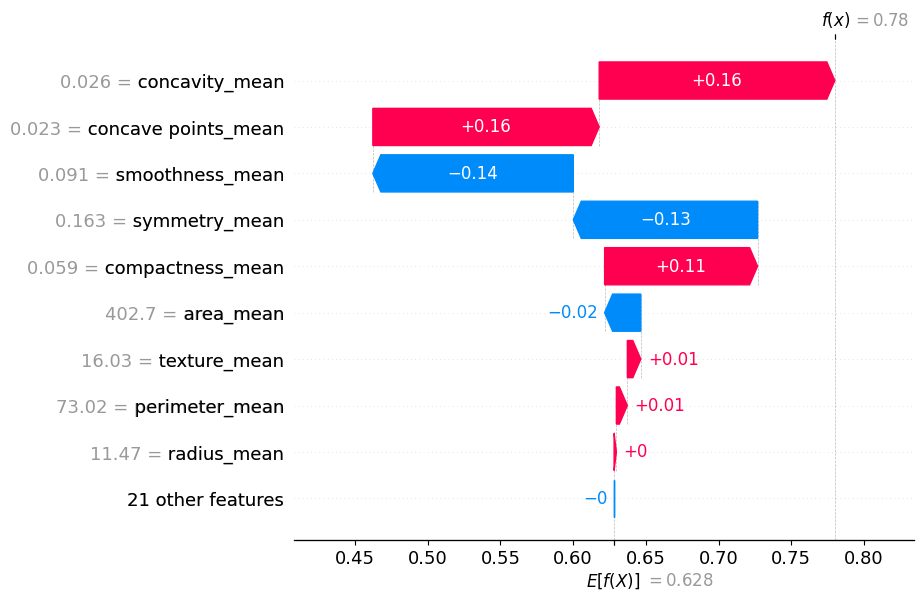

In [172]:

# waterfall plot for first observation
shap.plots.waterfall(shap_values[0][:,0])

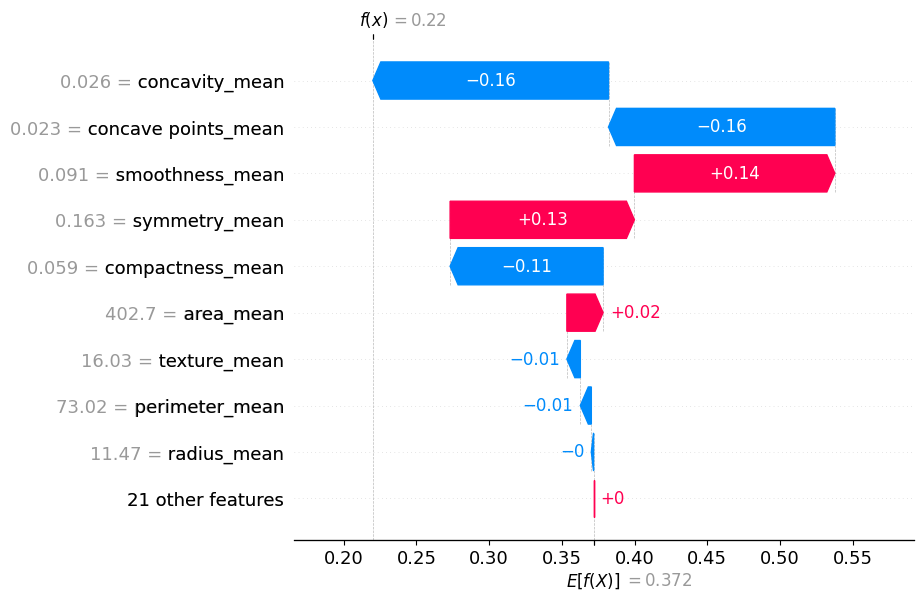

In [173]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[0][:,1])

In [174]:
y_test.iloc[67]

0

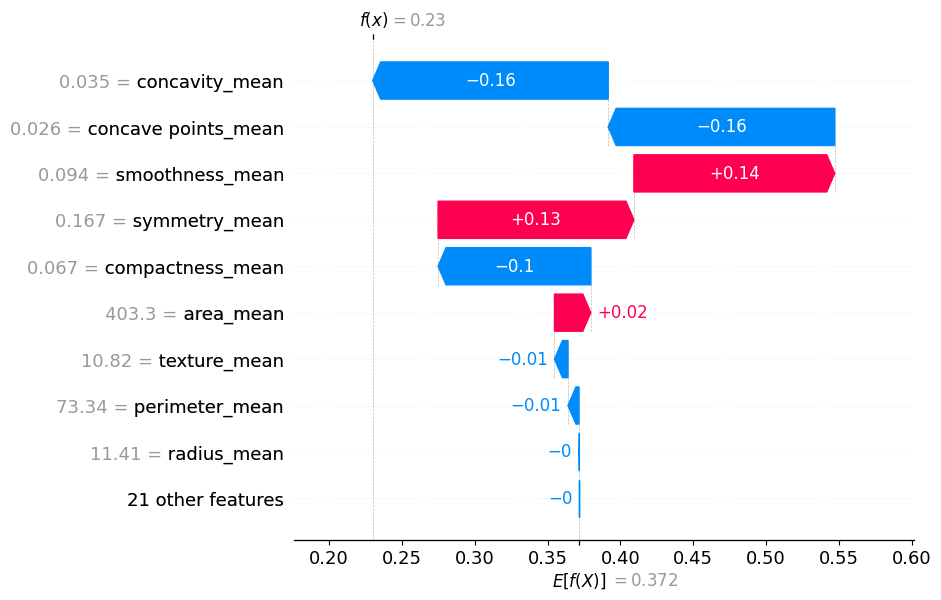

In [175]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[67][:,1])

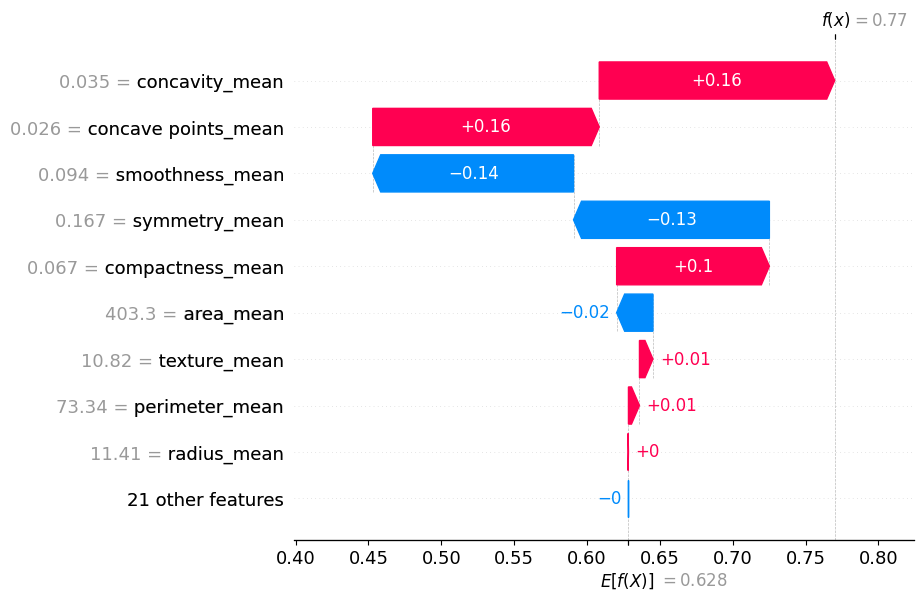

In [176]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[67][:,0])

In [177]:
y_test.iloc[10]

0

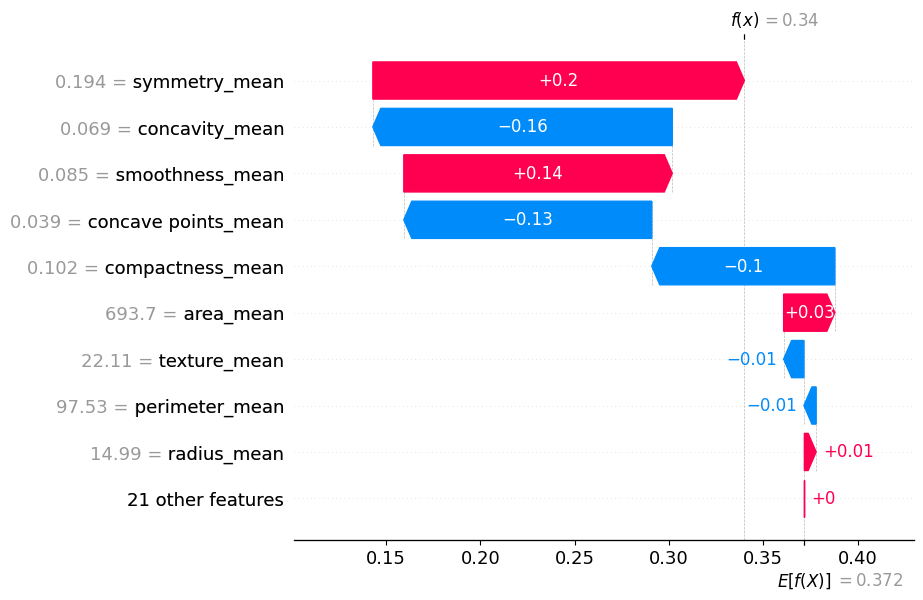

In [178]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[10][:,1])

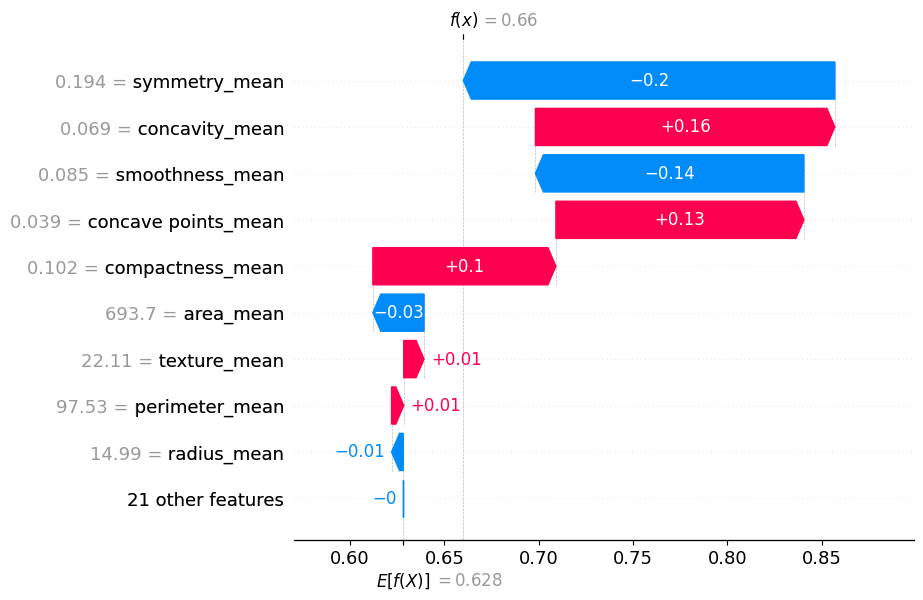

In [179]:
# waterfall plot for first observation
shap.plots.waterfall(shap_values[10][:,0])

### ForcePlot

In [180]:
y_test.iloc[0]

0

In [181]:
shap.initjs()
shap.plots.force(shap_values[0][:,0])

In [182]:
shap.initjs()
shap.plots.force(shap_values[0][:,1])

In [184]:
y_test.iloc[11]

0

In [186]:
shap.plots.force(shap_values[11][:,0])

In [185]:
shap.plots.force(shap_values[11][:,1])

In [134]:
shap_values[7]

.values =
array([[-0.01477229,  0.01477229],
       [ 0.00934337, -0.00934337],
       [ 0.00661686, -0.00661686],
       [-0.02828597,  0.02828597],
       [-0.1435001 ,  0.1435001 ],
       [ 0.0968548 , -0.0968548 ],
       [ 0.15400829, -0.15400829],
       [ 0.12382608, -0.12382608],
       [-0.20228738,  0.20228738],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0

In [140]:
shap.force_plot(explainer.expected_value[0],
                explainer.shap_values(X_test[:10])[0],
                feature_names=X.columns,
                out_names="cancer Type", figsize=(25,3))

In [149]:
X_test.iloc[0].values.reshape(1,-1)

array([[1.147e+01, 1.603e+01, 7.302e+01, 4.027e+02, 9.076e-02, 5.886e-02,
        2.587e-02, 2.322e-02, 1.634e-01, 6.372e-02, 1.707e-01, 7.615e-01,
        1.090e+00, 1.225e+01, 9.191e-03, 8.548e-03, 9.400e-03, 6.315e-03,
        1.755e-02, 3.009e-03, 1.251e+01, 2.079e+01, 7.967e+01, 4.758e+02,
        1.531e-01, 1.120e-01, 9.823e-02, 6.548e-02, 2.851e-01, 8.763e-02]])

In [152]:
len(explainer.shap_values(X_test.iloc[0].values.reshape(1,-1)))

2

In [150]:
shap.force_plot(explainer.expected_value[1],
                explainer.shap_values(X_test.iloc[0].values.reshape(1,-1))[1],
                feature_names=X.columns,
                out_names="Wine Type")

In [132]:
shap.plots.force(shap_values[7][:,1])

In [131]:
y_test.iloc[7]

1

In [ ]:
shap.plots.force(shap_values[6][:,0])

In [ ]:
shap.force_plot()

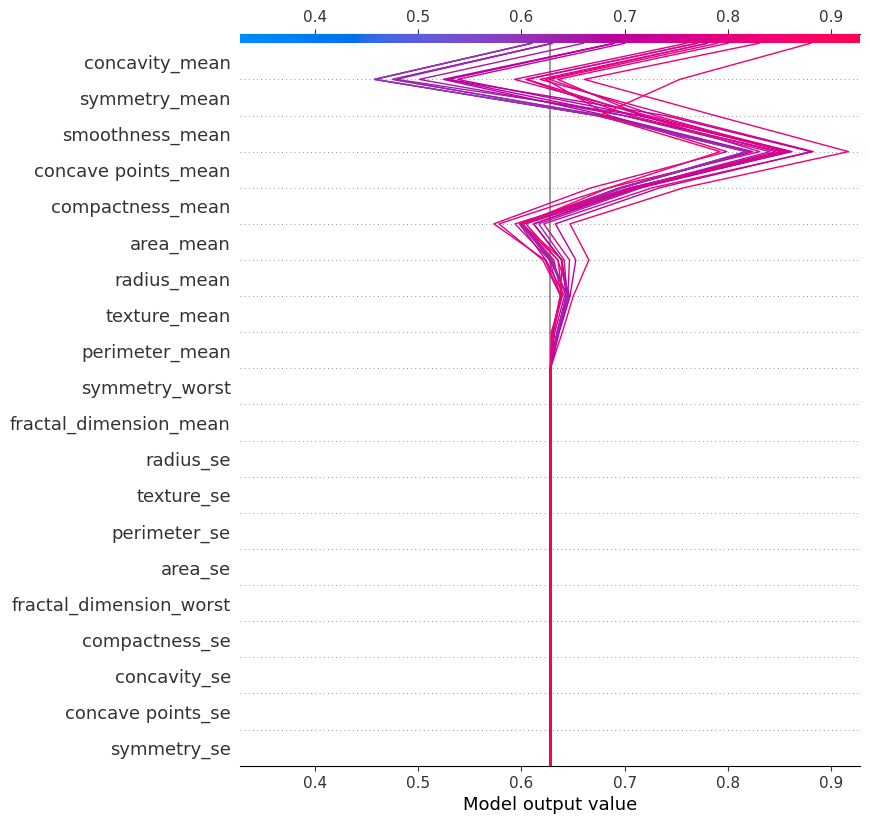

In [119]:

# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 20 observations
shap.decision_plot(expected_value[0], shap_array[0][0:20],feature_names=list(X.columns))

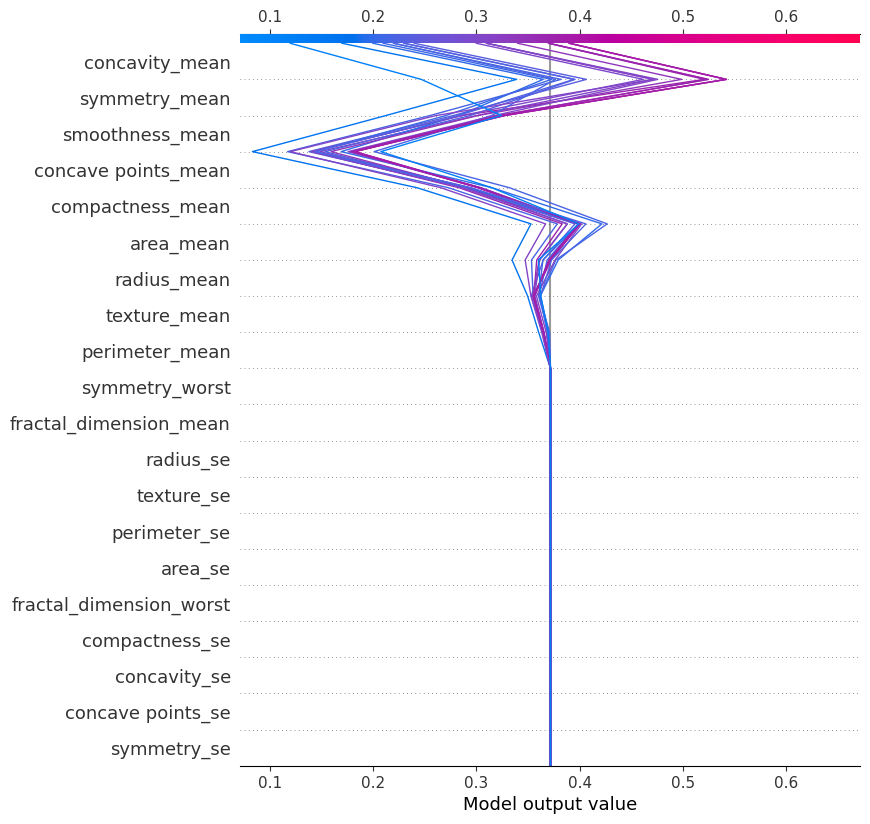

In [120]:

# Get expected value and shap values array
expected_value = explainer.expected_value
shap_array = explainer.shap_values(X_test)

#Descion plot for first 20 observations
shap.decision_plot(expected_value[1], shap_array[1][0:20],feature_names=list(X.columns))

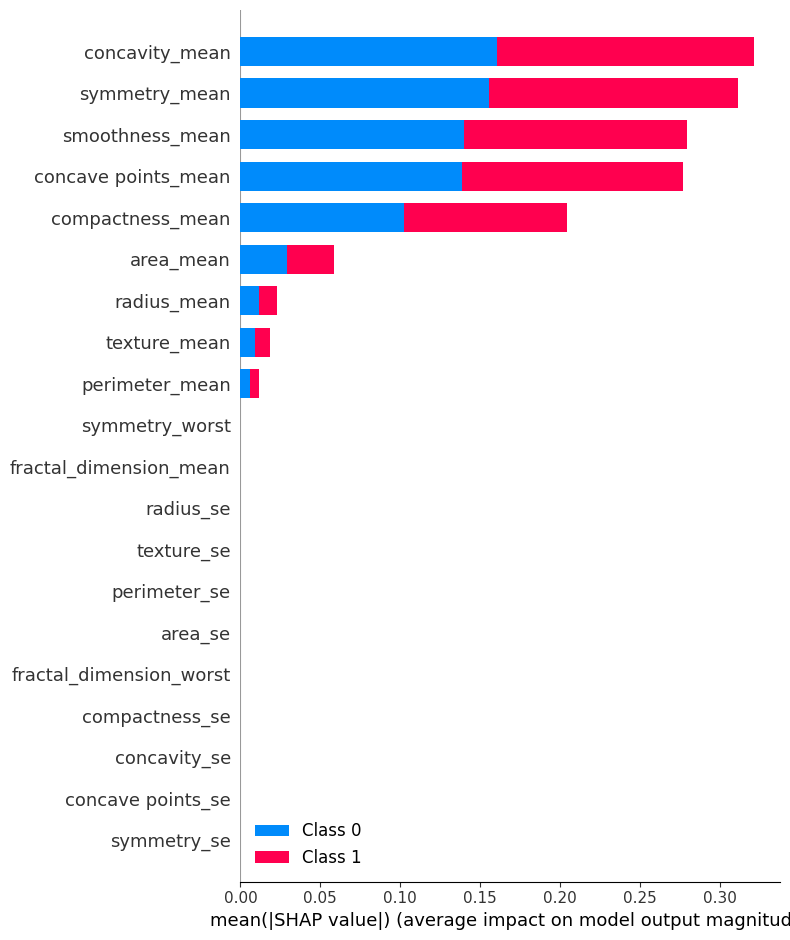

In [154]:
shap.summary_plot(explainer.shap_values(X_test),
                  feature_names=X.columns)

### Summary plot for class 0

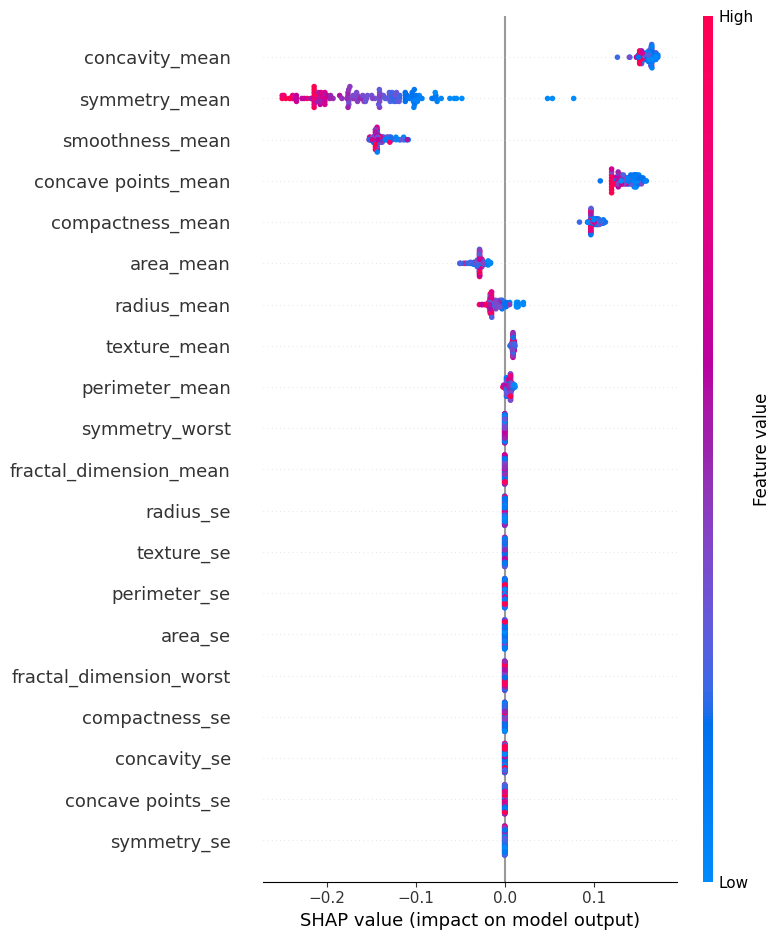

In [158]:
shap.summary_plot(explainer.shap_values(X_test)[0],
                  features=X_test,
                  feature_names=X_test.columns)